In [23]:
# !pip install textblob
# !pip install wordcloud
# !pip install nltk
# !pip install corpus


#### LAB 4 - Analysis of the frequency distribution of words in The Original Trilogy

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from PIL import Image

In [25]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Q1 - Find the characters with the most dialogues in each episode of The OriginalTrilogy (Episodes IV, V, VI).

In [26]:
# Load your dataset

file_path1 = 'SW_EpisodeIV.txt'
file_path2 = 'SW_EpisodeV.txt'
file_path3 = 'SW_EpisodeVI.txt'


def load_script(file_path):
    with open(file_path, 'r') as file:
        return file.read()

episode_iv = load_script(file_path1)
episode_v = load_script(file_path2)
episode_vi = load_script(file_path3)

In [27]:
import pandas as pd

# Function to create a DataFrame from episode text
def create_dataframe_from_text(episode_text):
    # Split the text into rows based on new lines
    rows = episode_text.split('\n')
    # Split each row into columns based on double quotes
    data = [row.split('"') for row in rows if row]
    # Create a DataFrame from the data
    df = pd.DataFrame(data)
    return df

# Create DataFrames for each episode
df_epi1 = create_dataframe_from_text(episode_iv)
df_epi2 = create_dataframe_from_text(episode_v)
df_epi3 = create_dataframe_from_text(episode_vi)

# Define column headers for the DataFrames
headers = ['No', 'Character', 'Dialog']

# Clean up the DataFrames
# Drop unnecessary columns
# Rename the remaining columns

df_epi1 = df_epi1.drop(columns=[0, 4, 2, 6, 7, 8, 9, 10]) 
df_epi1.columns = headers  
df_epi2 = df_epi2.drop(columns=[0, 4, 2, 6, 7, 8])  
df_epi2.columns = headers  
df_epi3 = df_epi3.drop(columns=[0, 4, 2, 6, 7, 8])  
df_epi3.columns = headers  


print('Top Characters by Number of Dialogues in Episode IV')
# Group by 'Character' and count the number of dialogs in Episode IV
grouped_data1 = df_epi1.groupby("Character").count()
# Sort by the number of dialogs in descending order and get the top 5
grouped_1 = grouped_data1.sort_values(by=['Dialog'], ascending=False).head(5)
print(grouped_1)
print('----------------------------------------------------')
# Repeat the same for Episode V and VI
print('Top Characters by Number of Dialogues in Episode V')
grouped_data2 = df_epi2.groupby("Character").count()
grouped_2 = grouped_data2.sort_values(by=['Dialog'], ascending=False).head(5)
print(grouped_2)
print('----------------------------------------------------')
print('Top Characters by Number of Dialogues in Episode Vi')
grouped_data3 = df_epi3.groupby("Character").count()
grouped_3 = grouped_data3.sort_values(by=['Dialog'], ascending=False).head(5)
print(grouped_3)
print('----------------------------------------------------')

Top Characters by Number of Dialogues in Episode IV
            No  Dialog
Character             
LUKE       254     254
HAN        153     153
THREEPIO   119     119
BEN         82      82
LEIA        57      57
----------------------------------------------------
Top Characters by Number of Dialogues in Episode V
            No  Dialog
Character             
HAN        182     182
LUKE       128     128
LEIA       114     114
THREEPIO    92      92
LANDO       61      61
----------------------------------------------------
Top Characters by Number of Dialogues in Episode Vi
            No  Dialog
Character             
HAN        124     124
LUKE       112     112
THREEPIO    90      90
LEIA        56      56
VADER       43      43
----------------------------------------------------


#### Q2. Plot the number of dialogues according to the character for each episode (i.e.plot the above findings).

C:\Users\USER\AppData\Local\Temp\ipykernel_18440\1128168784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dialog', y='Character', data= grouped_data1.sort_values(by=['Dialog'], ascending=False).head(10), palette='viridis')


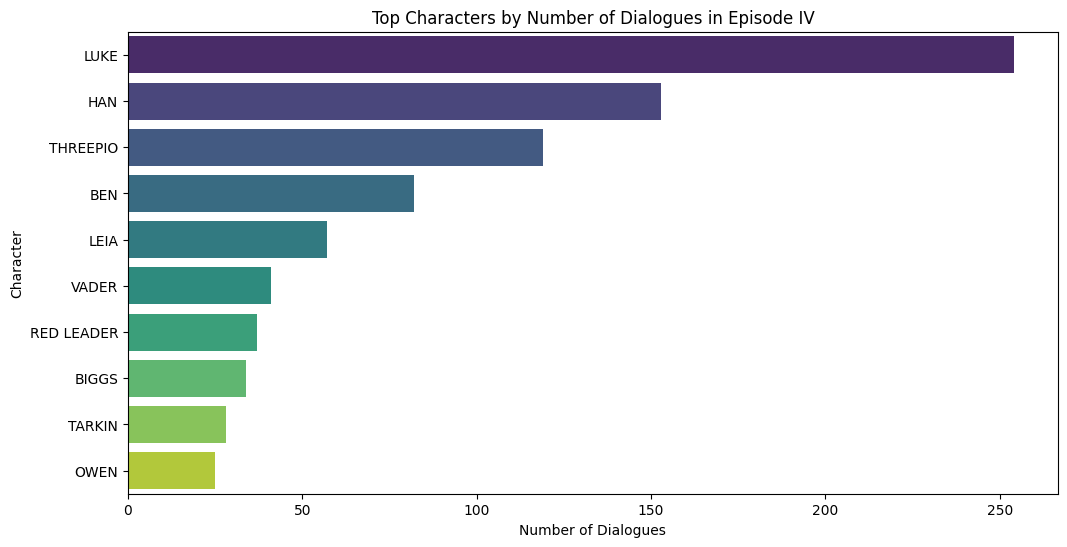

In [28]:
# PLot the Top Characters by Number of Dialogues in Episode IV
plt.figure(figsize=(12, 6))
sns.barplot(x='Dialog', y='Character', data= grouped_data1.sort_values(by=['Dialog'], ascending=False).head(10), palette='viridis')
plt.title(f'Top Characters by Number of Dialogues in Episode IV')
plt.xlabel('Number of Dialogues')
plt.ylabel('Character')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18440\947823515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dialog', y='Character', data= grouped_data2.sort_values(by=['Dialog'], ascending=False).head(10), palette='viridis')


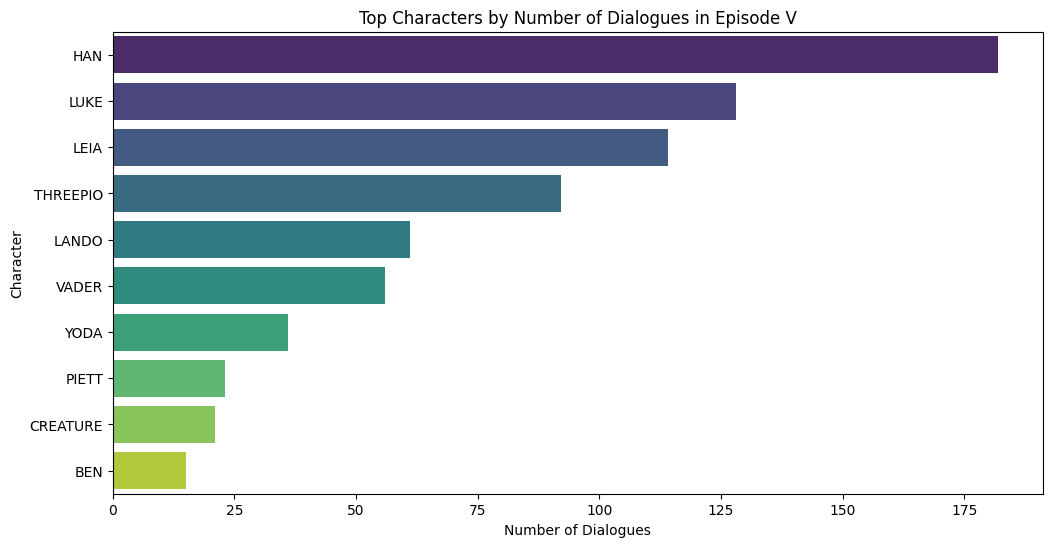

In [29]:
# PLot the Top Characters by Number of Dialogues in Episode V
plt.figure(figsize=(12, 6))
sns.barplot(x='Dialog', y='Character', data= grouped_data2.sort_values(by=['Dialog'], ascending=False).head(10), palette='viridis')
plt.title(f'Top Characters by Number of Dialogues in Episode V')
plt.xlabel('Number of Dialogues')
plt.ylabel('Character')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18440\3977758299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dialog', y='Character', data= grouped_data3.sort_values(by=['Dialog'], ascending=False).head(10), palette='viridis')


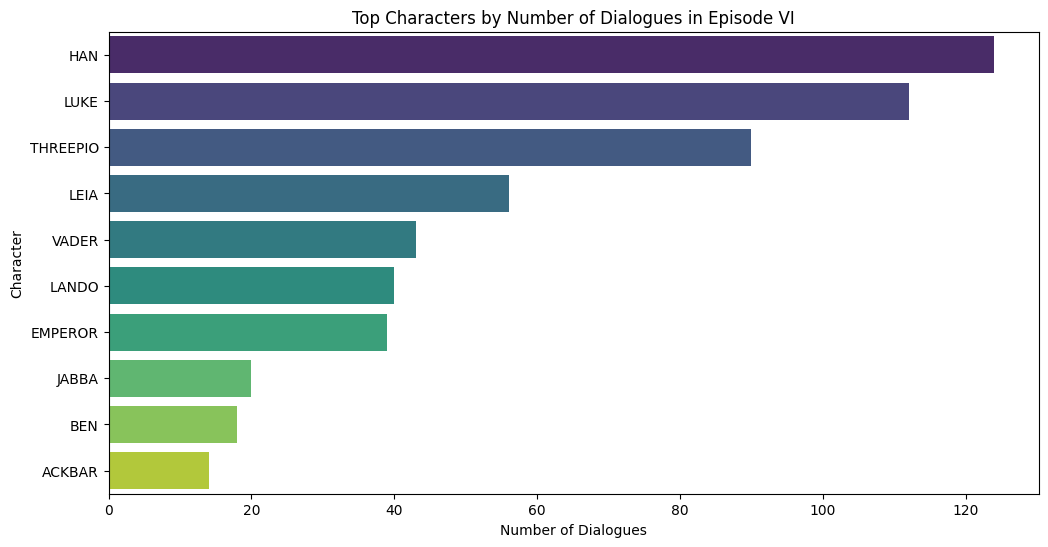

In [30]:
# PLot the Top Characters by Number of Dialogues in Episode VI
plt.figure(figsize=(12, 6))
sns.barplot(x='Dialog', y='Character', data= grouped_data3.sort_values(by=['Dialog'], ascending=False).head(10), palette='viridis')
plt.title(f'Top Characters by Number of Dialogues in Episode VI')
plt.xlabel('Number of Dialogues')
plt.ylabel('Character')
plt.show()

#### Q3. Add a new column “episode” to the three datasets (to distinguish between the threeepisodes) and concatenate them into one dataset.

In [31]:
# NEw Colummn as Episode
df_epi1['Episode'] = 'IV'
df_epi2['Episode'] = 'V'
df_epi3['Episode'] = 'V1'

# Concatenate the DataFrames into one
combined_df = pd.concat([df_epi1, df_epi2, df_epi3], ignore_index=True)
combined_df = combined_df.drop(0)

# Add header
headers = ['No', 'Character', 'Dialog', 'Episode']
combined_df.columns = headers
combined_df

,No,Character,Dialog,Episode
1,1,THREEPIO,Did you hear that? They've shut down the main...,IV
2,2,THREEPIO,We're doomed!,IV
3,3,THREEPIO,There'll be no escape for the Princess this time.,IV
4,4,THREEPIO,What's that?,IV
5,5,THREEPIO,I should have known better than to trust the l...,IV
...,...,...,...,...
2521,670,LANDO,"Wedge, I don't think we're going to make it.",V1
2522,671,WEDGE,You'll make it. Just follow me Gold Leader.,V1
2523,672,LANDO,I promised to return his ship without a scratc...,V1
2524,673,HAN,Lando...,V1


#### Q4.Discover the frequency distribution of words in The Original Trilogy.

In [32]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# List to hold all tokens
tokens = []

# Iterate over each dialogue in the DataFrame
for sentence in combined_df['Dialog'].dropna():
    # Convert to lowercase and remove punctuation
    sentence = re.sub(r'[^\w\s]', '', sentence.lower())
    # Tokenize the sentence
    words = word_tokenize(sentence)

    tokens.extend(words)
    
# Calculate word frequencies
word_freq = Counter(tokens)

# Select the top 30 words from the frequency distribution
top_words = dict(word_freq.most_common(30))

df_top_words = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])
df_top_words.head(30)


,Word,Frequency
0,the,910
1,you,896
2,i,672
3,to,644
4,a,436
5,of,351
6,it,326
7,your,288
8,is,272
9,be,246


#### Q5 Create a Frequency Distribution plot of the most repeated words in The OriginalTrilogy.

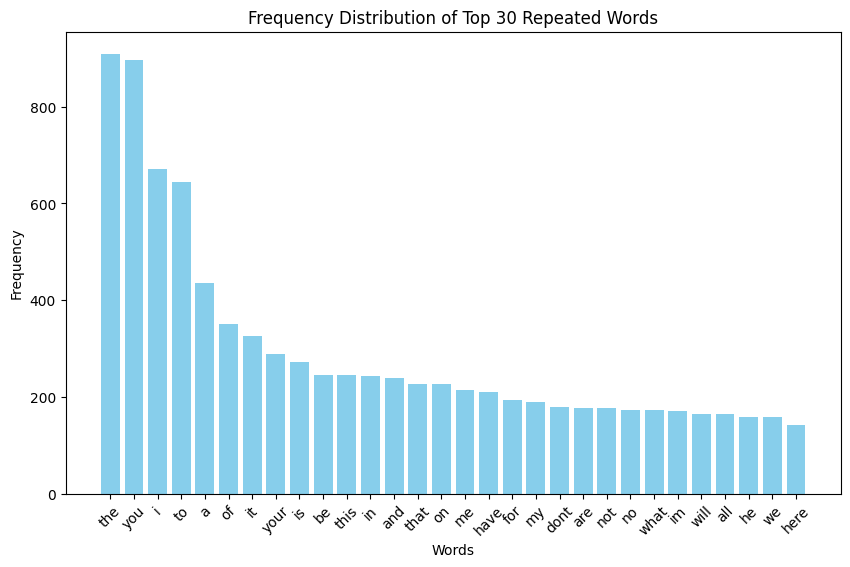

In [33]:
# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Top 30 Repeated Words')
plt.xticks(rotation=45)
plt.show()

#### Perform text-mining operations to prepare your dataset for further text analysis.
##### a.Convert to lower case, word tokenization, removing stopwords, lexiconnormalization (lemmatization), etc.

In [36]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


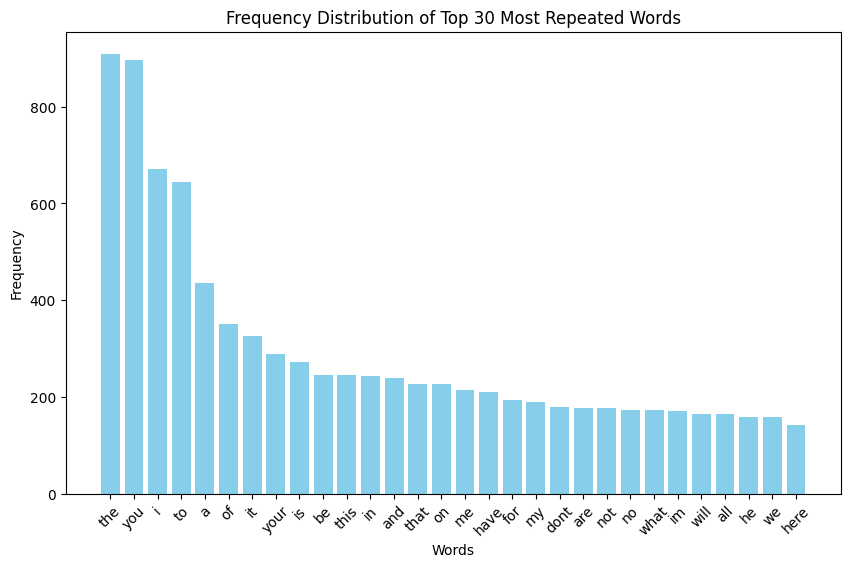

In [37]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# List to hold all tokens
tokens_improved= []


for sentence in combined_df['Dialog'].dropna():
    if isinstance(sentence, str):
        # Convert to lowercase and remove punctuation
        sentence = re.sub(r'[^\w\s]', '', sentence.lower())
        # Tokenize the sentence
        words = word_tokenize(sentence)
        # Filter out stopwords and lemmatize
        filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        # Extend the tokens list with filtered words
        tokens_improved.extend(filtered_words)
        
        
# Count the frequency of each word
word_freq = Counter(tokens_improved)

# Select the top 30 words
top_words = dict(word_freq.most_common(30))

# plot Frequency Distribution of Top 30 Most Repeated Words
plt.figure(figsize=(10, 6))
plt.bar(df_top_words['Word'], df_top_words['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Top 30 Most Repeated Words')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Remove null values in Dialog
combined_df['Dialog'] = combined_df['Dialog'].fillna('')
# Convert to lowercase
Lowercase = combined_df['Dialog'].str.lower().apply(word_tokenize)
script_df = combined_df
script_df['new_script'] = Lowercase
script_df

# word tokenization, 
tokenize = script_df['new_script'].apply(lambda tokens: ' '.join(tokens))
script_df['new_script'] = tokenize
script_df

# replace special charactors
stopmarks = script_df['new_script'].str.replace(r"[^\w\s]|_", '', regex=True)
script_df['new_script'] = stopmarks
script_df

#Remove Single Letters
single_letters = script_df['new_script'].apply(lambda text: ' '.join([word for word in text.split() if len(word) > 1 and not word.isdigit()]))
script_df['new_script'] = single_letters
script_df

# remove unwanted words
unwanted = script_df['new_script'].apply(lambda text: ' '.join([word for word in text.split() if word not in ['nt', 're', 'll','ve']]))
script_df['new_script'] = unwanted
script_df


def lemmatize_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(lemmatized_words) 

# perform lemmatization
lemmatizer = WordNetLemmatizer()
lemmatization = script_df['new_script'].apply(lemmatize_text)
script_df['new_script'] = lemmatization
script_df

,No,Character,Dialog,Episode,new_script
1,1,THREEPIO,Did you hear that? They've shut down the main...,IV,hear shut main reactor destroyed sure madness
2,2,THREEPIO,We're doomed!,IV,doomed
3,3,THREEPIO,There'll be no escape for the Princess this time.,IV,escape princess time
4,4,THREEPIO,What's that?,IV,
5,5,THREEPIO,I should have known better than to trust the l...,IV,known better trust logic halfsized thermocapsu...
...,...,...,...,...,...
2521,670,LANDO,"Wedge, I don't think we're going to make it.",V1,wedge think going make
2522,671,WEDGE,You'll make it. Just follow me Gold Leader.,V1,make follow gold leader
2523,672,LANDO,I promised to return his ship without a scratc...,V1,promised return ship without scratch sure hope...
2524,673,HAN,Lando...,V1,lando


#### Repeat steps 4 & 5 but check the frequency distribution of the “new_script” this time

      Word  Frequency
0     dont        180
1       im        170
2      get        129
3     luke        129
4     well        121
5    going        121
6    right        113
7     come        111
8     know        109
9       oh        109
10     sir         90
11   youre         88
12     see         88
13      go         88
14       u         83
15     got         81
16   artoo         80
17    good         79
18    take         75
19     yes         75
20    ship         74
21    back         73
22     one         72
23    like         67
24    look         65
25  chewie         64
26    must         63
27   think         63
28    time         61
29     let         60


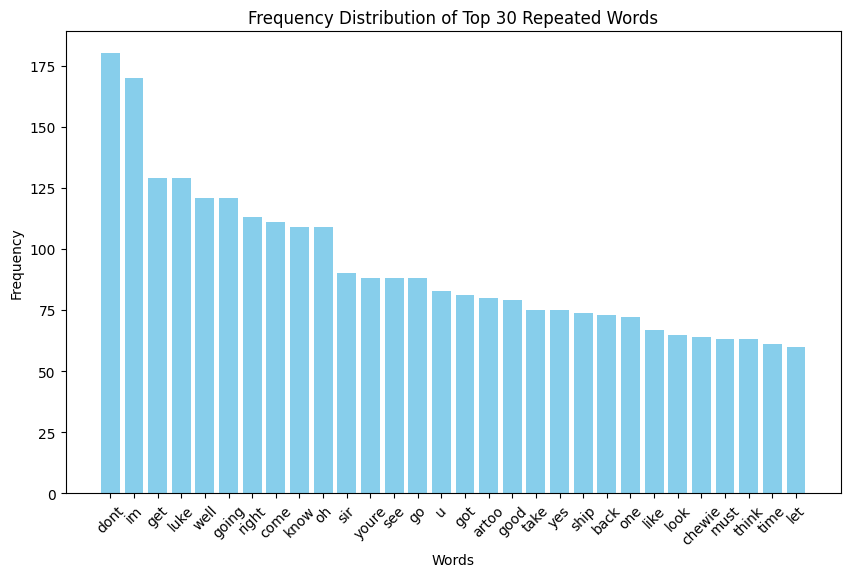

In [40]:
# List to hold all tokens
tokens_ferther = []

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Iterate over each dialogue in the DataFrame
for sentence in script_df['new_script'].dropna():
    # Convert to lowercase and remove punctuation
    sentence = re.sub(r'[^\w\s]', '', sentence.lower())
    # Tokenize the sentence
    words = word_tokenize(sentence)
    # Extend the tokens list with filtered words
    tokens_ferther.extend(words)
    
# Select the top 30 words from the frequency distribution
top_words = dict(word_freq.most_common(30))

df_top_words = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])
print(df_top_words.head(30))


# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Top 30 Repeated Words')
plt.xticks(rotation=45)
plt.show()

#### Q8 - Use Word Clouds to visually represent the most repeated words for Darth Vader andYoda.

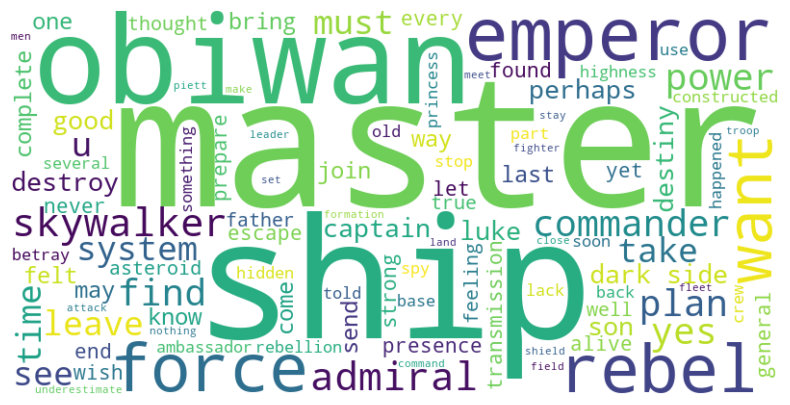

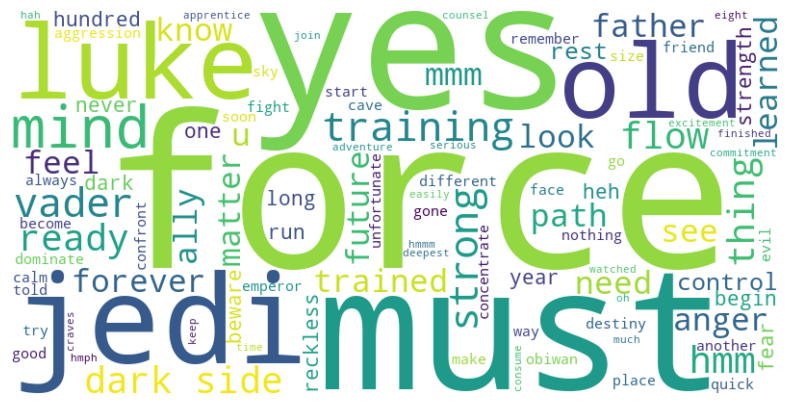

In [63]:
# Get dialogues of Darth Vader & Yoda
varder_text = script_df.loc[script_df['Character'] == 'VADER', 'new_script'].str.cat(sep=' ')
yoda_text = script_df.loc[script_df['Character'] == 'YODA', 'new_script'].str.cat(sep=' ')

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Work Clud of Varda
generate_wordcloud(varder_text)

# Word Clould of Yoda 
generate_wordcloud(yoda_text)

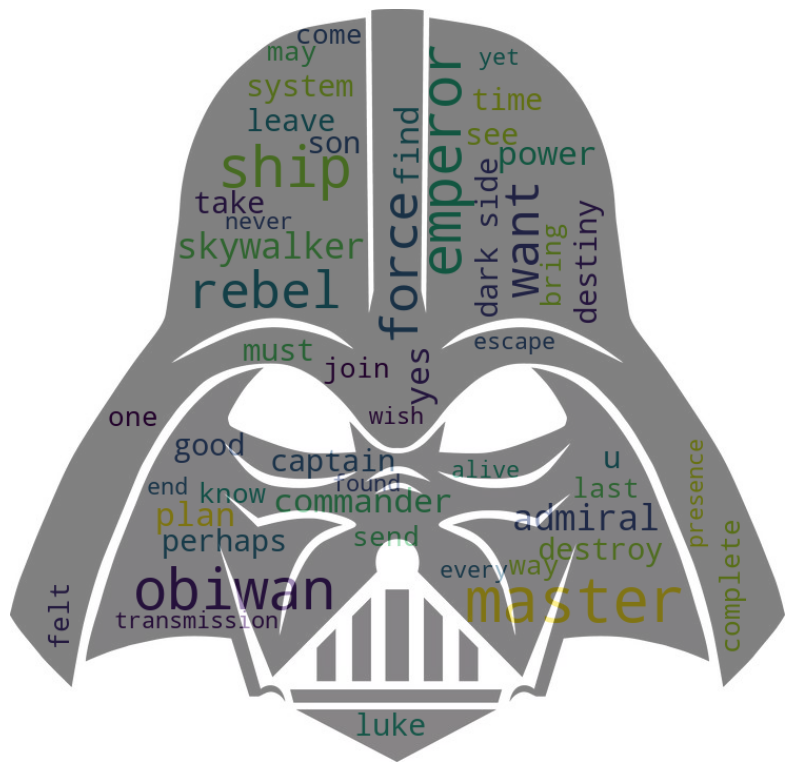

In [64]:
# Get vader the mask image
mask_image = np.array(Image.open("vader.jpg"))

# Generate the Word Cloud for Vader
wordcloud = WordCloud(mask=mask_image, width=800, height=400, max_words=50, background_color='white').generate(varder_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(mask_image, cmap=plt.cm.gray, interpolation='bilinear', alpha=0.5)
plt.axis('off')
plt.show()

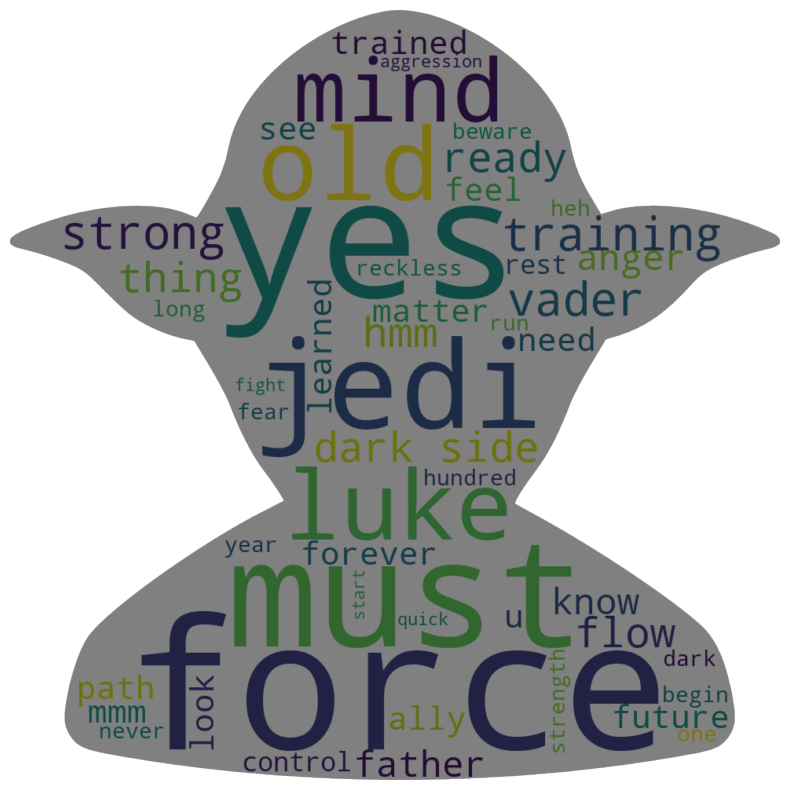

In [65]:
# Get yoda the mask image
mask_image = np.array(Image.open("yoda.png"))

# Generate the Word Cloud for Vader
wordcloud = WordCloud(mask=mask_image, width=800, height=400, max_words=50, background_color='white').generate(yoda_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(mask_image, cmap=plt.cm.gray, interpolation='bilinear', alpha=0.5)
plt.axis('off')
plt.show()

#### Q9 - Discover the most relevant words in The Original Trilogy script using the TF-IDF model.

In [66]:
# Get the New Script
text_data = script_df['new_script']

tfidf = TfidfVectorizer()

# fit and transform the text data
matrix = tfidf.fit_transform(text_data)

# get the feature names (words) 
# 
feature_names = tfidf.get_feature_names_out()

# calculate the relevance scores
relevance_scores = matrix.toarray().sum(axis=0)

# sort the words based on their relevance scores
top_words = {}
for word, score in sorted(zip(feature_names, relevance_scores), key=lambda x: x[1], reverse=True)[:10]:
    top_words[word] = score
    
df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Score'])
print(df)

    Word      Score
0   luke  46.942168
1   come  45.285590
2  right  44.231056
3  going  41.704630
4    get  39.771700
5    yes  39.627284
6     oh  39.625679
7   know  37.224465
8     go  33.935291
9    sir  33.699115


#### Q10 - Perform sentiment analysis on the movie scripts.

In [46]:
# pip install nltk vaderSentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [67]:
analyzer = SentimentIntensityAnalyzer()

# fn calculate sentiment scores
def get_sentiment_scores(dialog):
    scores = analyzer.polarity_scores(dialog)
    return scores

# Get sentiment from the 'Dialog' column
script_df['Sentiment'] = script_df['Dialog'].apply(get_sentiment_scores)

# New column compound score for simplicity
script_df['Compound'] = script_df['Sentiment'].apply(lambda x: x['compound'])

script_df

,No,Character,Dialog,Episode,new_script,Sentiment,Compound
1,1,THREEPIO,Did you hear that? They've shut down the main...,IV,hear shut main reactor destroyed sure madness,"{'neg': 0.27, 'neu': 0.633, 'pos': 0.097, 'com...",-0.6239
2,2,THREEPIO,We're doomed!,IV,doomed,"{'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...",-0.6696
3,3,THREEPIO,There'll be no escape for the Princess this time.,IV,escape princess time,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...",-0.1326
4,4,THREEPIO,What's that?,IV,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5,5,THREEPIO,I should have known better than to trust the l...,IV,known better trust logic halfsized thermocapsu...,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...",0.7351
...,...,...,...,...,...,...,...
2521,670,LANDO,"Wedge, I don't think we're going to make it.",V1,wedge think going make,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2522,671,WEDGE,You'll make it. Just follow me Gold Leader.,V1,make follow gold leader,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2523,672,LANDO,I promised to return his ship without a scratc...,V1,promised return ship without scratch sure hope...,"{'neg': 0.089, 'neu': 0.544, 'pos': 0.367, 'co...",0.7301
2524,673,HAN,Lando...,V1,lando,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [68]:
# Calculate average sentiment scores for each side
positive_sentiment = script_df.groupby('Character')['Compound'].mean().reset_index().sort_values(by='Compound', ascending=False).head(20)
negative_sentiment = script_df.groupby('Character')['Compound'].mean().reset_index().sort_values(by='Compound', ascending=True).head(20)

positive_sentiment['Sentiment'] = 'Positive'
negative_sentiment['Sentiment'] = 'Negative'

# Display the results
print(positive_sentiment)
print(negative_sentiment)

                          Character  Compound Sentiment
27            DEATH STAR CONTROLLER  0.612400  Positive
74                         OPERATOR  0.401900  Positive
97                         SCOUT #2  0.401900  Positive
99                 SECOND COMMANDER  0.401900  Positive
33                 FIRST CONTROLLER  0.401900  Positive
22           CONTROL ROOM COMMANDER  0.401900  Positive
70                       NINEDENINE  0.393983  Positive
119  VOICE OVER DEATH STAR INTERCOM  0.381800  Positive
17                            CHIEF  0.350550  Positive
9                              BERU  0.318200  Positive
96                         SCOUT #1  0.254000  Positive
65                    MEDICAL DROID  0.246950  Positive
26                             DEAK  0.240100  Positive
81                           PILOTS  0.226300  Positive
24                         CREATURE  0.212932  Positive
20           COMMUNICATIONS OFFICER  0.200950  Positive
123                         WINGMAN  0.200950  P

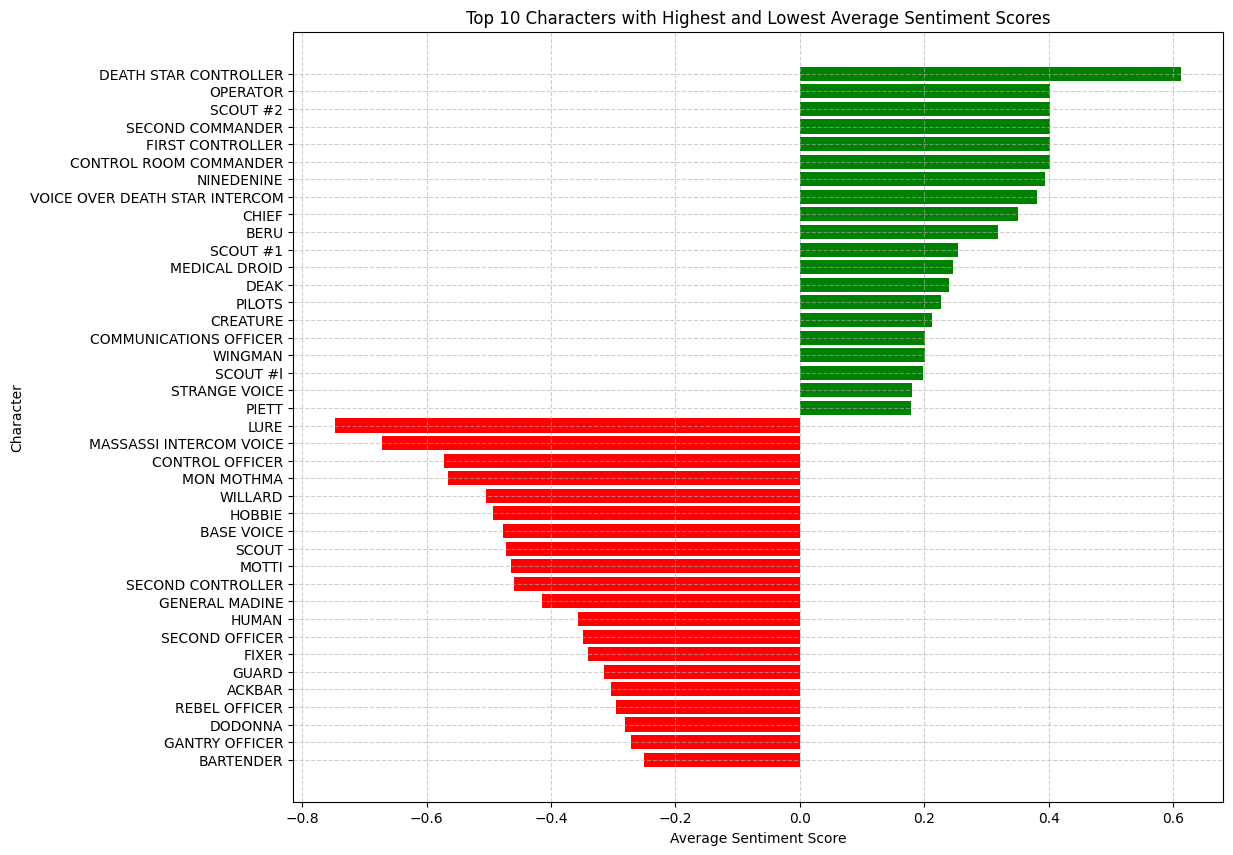

In [69]:
# Combine positive and negative sentiment DataFrames
combined_sentiment = pd.concat([positive_sentiment, negative_sentiment])

# Plotting
plt.figure(figsize=(12, 10))
colors = {'Positive': 'green', 'Negative': 'red'}

# Bar plot
plt.barh(combined_sentiment['Character'], combined_sentiment['Compound'], color=combined_sentiment['Sentiment'].map(colors))
plt.xlabel('Average Sentiment Score')
plt.ylabel('Character')
plt.title('Top 10 Characters with Highest and Lowest Average Sentiment Scores')
plt.gca().invert_yaxis()  # To display the highest scores at the top
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Positive Sentiment:
Characters with high positive scores are mostly from the Death Star (e.g., DEATH STAR CONTROLLER, OPERATOR).
BERU, who is a good character, also has a positive score.


Negative Sentiment:
Characters with high negative scores include Imperial officers (e.g., PIETT, MOTTI) and Rebel leaders (e.g., MON MOTHMA).
PIETT and MOTTI are bad guys, which matches their negative scores.